<a href="https://colab.research.google.com/github/MrDataProf/Pandas-Analytics-Project/blob/main/Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
financial = pd.read_excel('Financial Sample.xlsx')

In [ ]:
print('The Dataset comprises of',financial.shape[0],'rows')
print('The Dataset comprises of',financial.shape[1],'columns')

The Dataset comprises of 700 rows
The Dataset comprises of 16 columns


In [ ]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [ ]:
financial.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [ ]:
financial.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [ ]:
financial.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

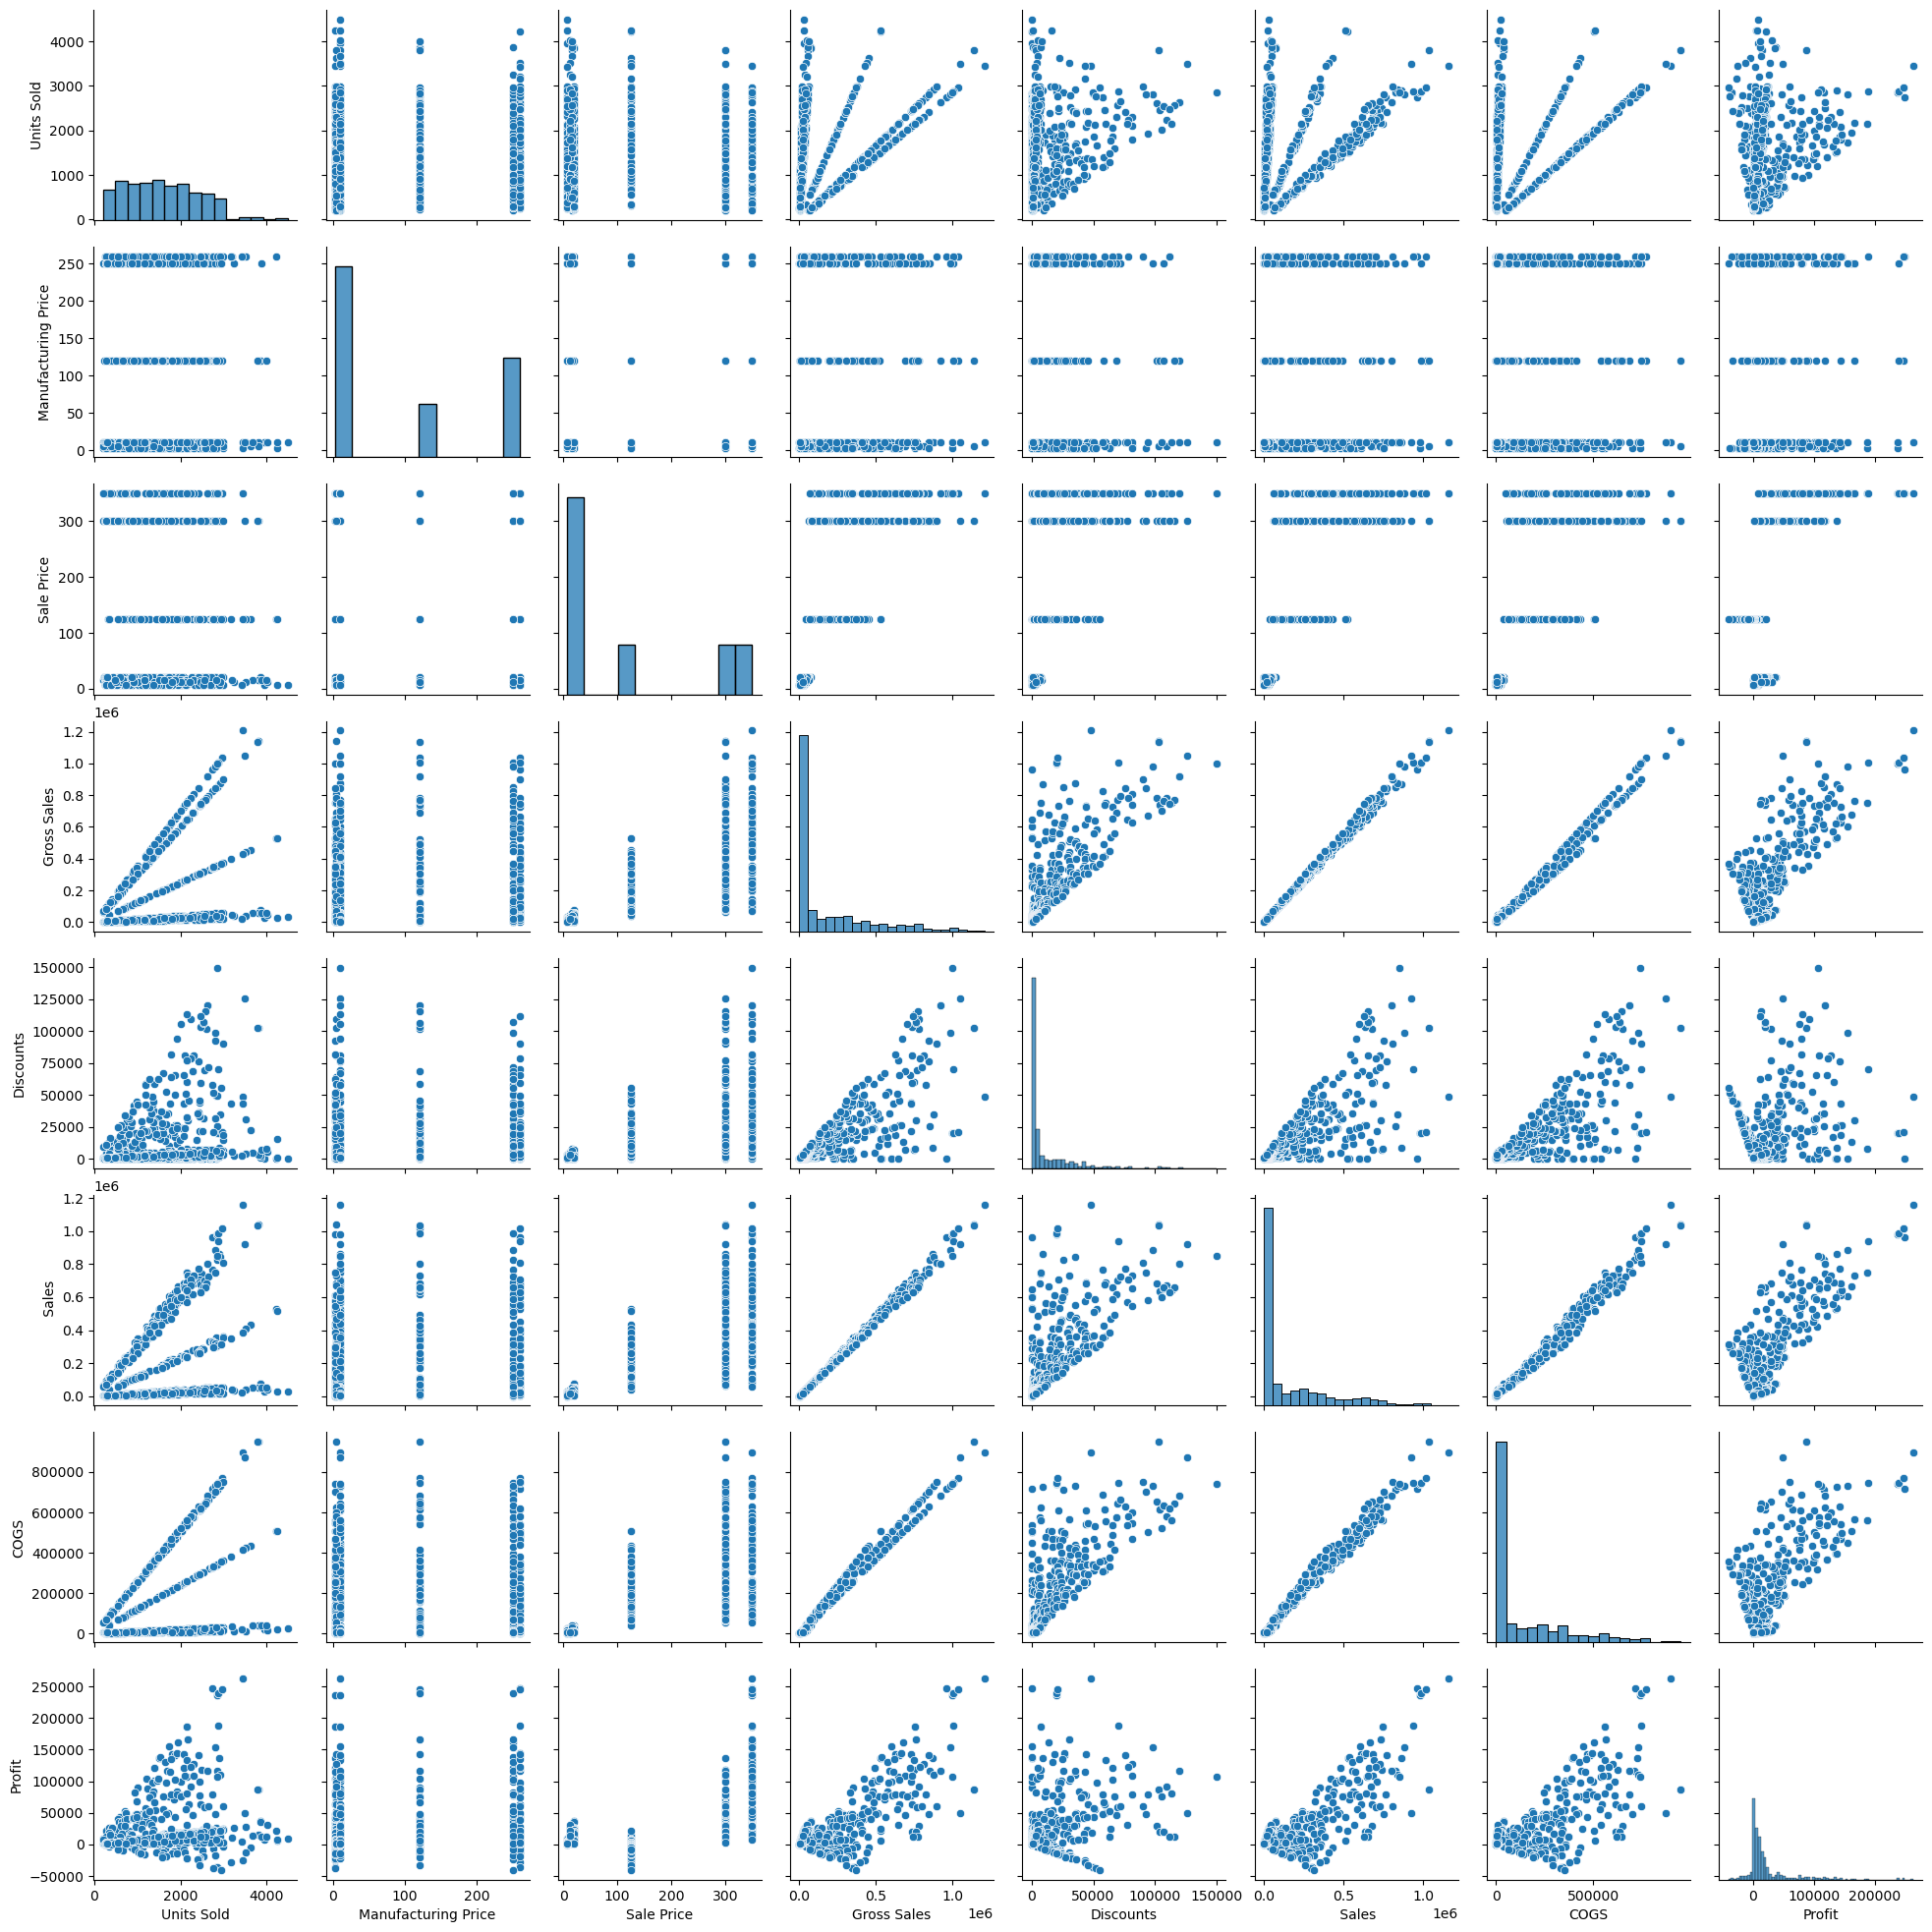

In [ ]:
sns.pairplot(financial[['Units Sold','Manufacturing Price','Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit','Date']])

In [ ]:
lr = LinearRegression()

In [ ]:
financial.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [ ]:
y = financial[[' Sales']]
X = financial[['Units Sold','Manufacturing Price', 'Sale Price', 'Gross Sales','COGS', 'Profit']]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[ 200499.        ],
       [  10733.4       ],
       [  25134.4       ],
       [ 708439.5       ],
       [  10298.82      ],
       [ 597408.        ],
       [  26698.8       ],
       [  21573.        ],
       [ 552391.        ],
       [ 382788.        ],
       [ 848172.5       ],
       [ 608499.        ],
       [  92064.        ],
       [ 225596.25      ],
       [ 801444.        ],
       [  44378.4       ],
       [   2293.2       ],
       [  20826.        ],
       [ 385968.        ],
       [   9837.17      ],
       [  23588.8       ],
       [ 313317.        ],
       [ 429660.        ],
       [ 492184.        ],
       [ 492184.        ],
       [ 290625.        ],
       [   8653.5       ],
       [  34095.6       ],
       [  34238.        ],
       [  21261.        ],
       [ 986811.        ],
       [ 107156.        ],
       [ 665420.        ],
       [ 508032.        ],
       [ 582048.        ],
       [ 509691.        ],
       [  15928.        ],
 

<Axes: xlabel=' Sales', ylabel='Count'>

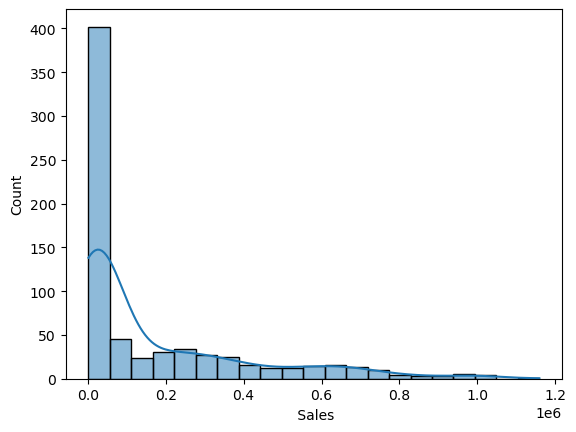

In [ ]:
sns.histplot(financial[' Sales'],kde=True)

<Axes: >

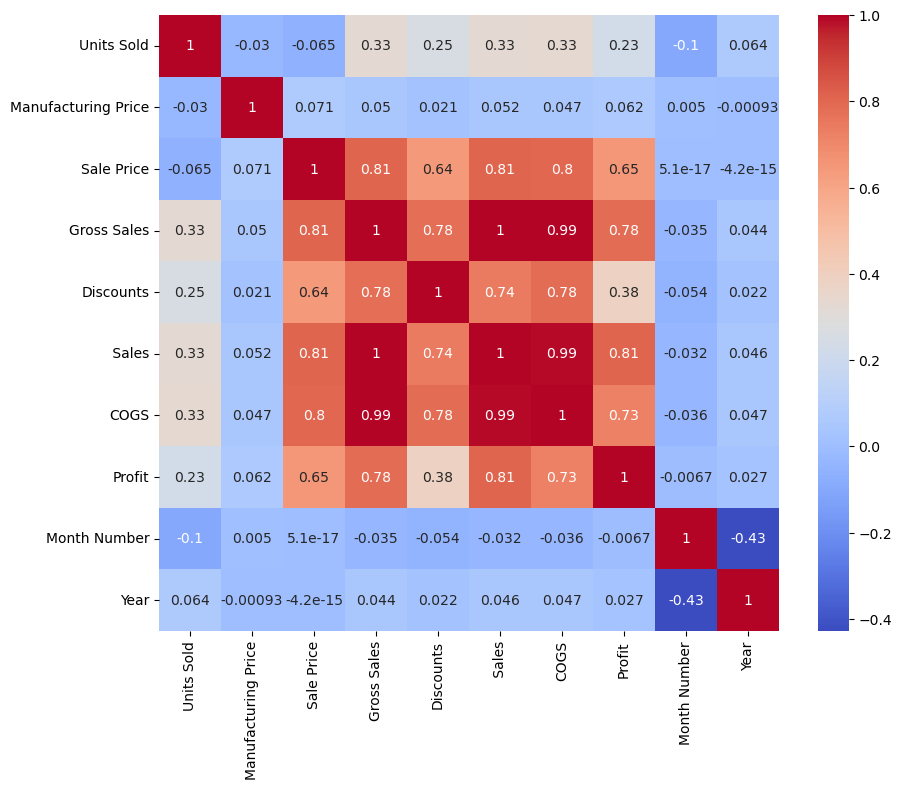

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(financial.corr(), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score, precision_score, roc_curve, r2_score, mean_absolute_error, mean_squared_error

<Axes: xlabel='Segment', ylabel=' Sales'>

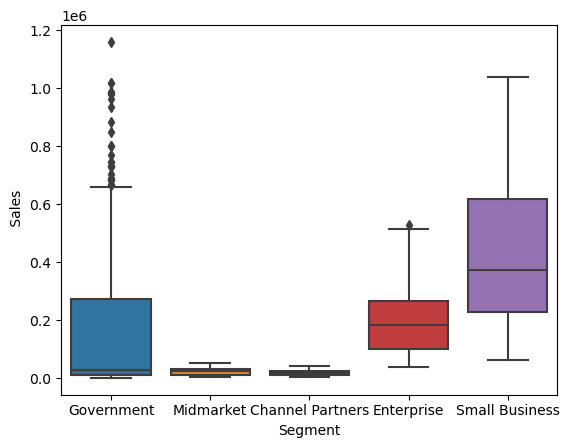

In [ ]:
sns.boxplot(x='Segment',y=' Sales', data=financial)

<Axes: xlabel='Country', ylabel=' Sales'>

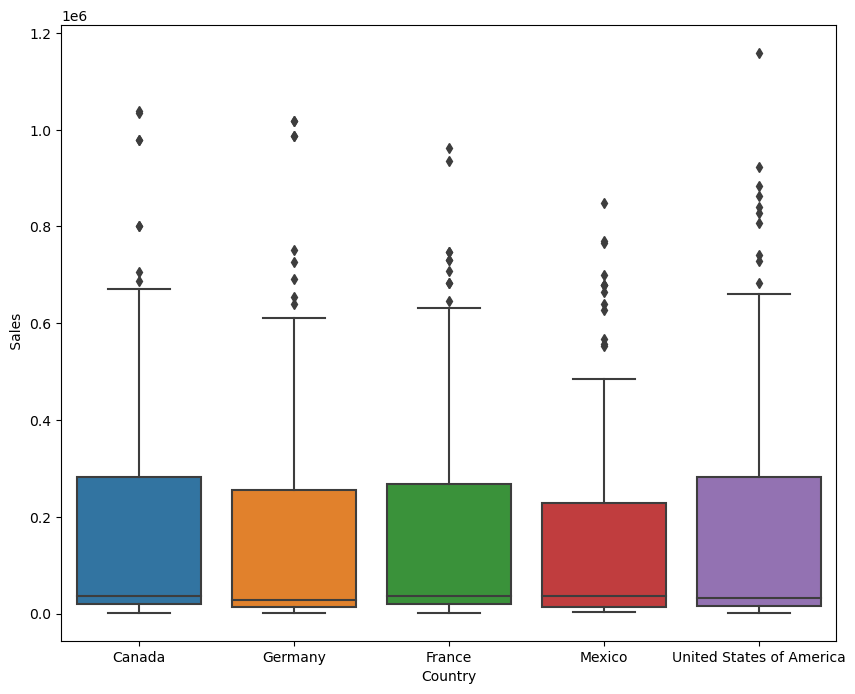

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Country',y=' Sales',data=financial)


Text(0.5, 1.0, 'The Scatter Plot for Sales vs Discounts')

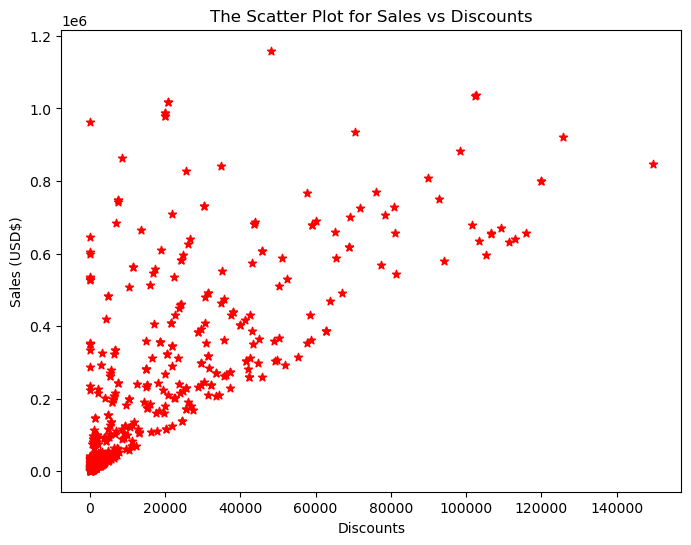

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(x=financial['Discounts'],y=financial[' Sales'],color='red',marker='*')
plt.xlabel('Discounts')
plt.ylabel('Sales (USD$)')
plt.title('The Scatter Plot for Sales vs Discounts')